In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = [16, 8]
plt.rcParams.update({'font.size': 18})

theta = np.array([np.pi/15, -np.pi/9, -np.pi/20])
print(theta)
Sigma = np.diag([3, 1, 0.5]) # scale x, then y, then z
print(Sigma)

# Rotation about x axis
Rx = np.array([[1, 0, 0],
               [0, np.cos(theta[0]), -np.sin(theta[0])],
               [0, np.sin(theta[0]), np.cos(theta[0])]])

# Rotation about y axis
Ry = np.array([[np.cos(theta[1]), 0, np.sin(theta[1])],
               [0, 1, 0],
               [-np.sin(theta[1]), 0, np.cos(theta[1])]])

# Rotation about z axis
Rz = np.array([[np.cos(theta[2]), -np.sin(theta[2]), 0],
               [np.sin(theta[2]), np.cos(theta[2]), 0],
               [0, 0, 1]])

# Rotate and scale
X = Rz @ Ry @ Rx @ Sigma
print(X)

# U, S, VT = np.linalg.svd(X, full_matrices=False)
# X = U @ np.diag(S)

[ 0.20943951 -0.34906585 -0.15707963]
[[3.  0.  0. ]
 [0.  1.  0. ]
 [0.  0.  0.5]]
[[ 2.78437034  0.08278149 -0.18147596]
 [-0.44100094  0.97722903 -0.0765087 ]
 [ 1.02606043  0.19537308  0.45957904]]


[-3.14159265 -3.07812614 -3.01465962 -2.9511931  -2.88772658 -2.82426006
 -2.76079354 -2.69732703 -2.63386051 -2.57039399 -2.50692747 -2.44346095
 -2.37999443 -2.31652792 -2.2530614  -2.18959488 -2.12612836 -2.06266184
 -1.99919533 -1.93572881 -1.87226229 -1.80879577 -1.74532925 -1.68186273
 -1.61839622 -1.5549297  -1.49146318 -1.42799666 -1.36453014 -1.30106362
 -1.23759711 -1.17413059 -1.11066407 -1.04719755 -0.98373103 -0.92026451
 -0.856798   -0.79333148 -0.72986496 -0.66639844 -0.60293192 -0.53946541
 -0.47599889 -0.41253237 -0.34906585 -0.28559933 -0.22213281 -0.1586663
 -0.09519978 -0.03173326  0.03173326  0.09519978  0.1586663   0.22213281
  0.28559933  0.34906585  0.41253237  0.47599889  0.53946541  0.60293192
  0.66639844  0.72986496  0.79333148  0.856798    0.92026451  0.98373103
  1.04719755  1.11066407  1.17413059  1.23759711  1.30106362  1.36453014
  1.42799666  1.49146318  1.5549297   1.61839622  1.68186273  1.74532925
  1.80879577  1.87226229  1.93572881  1.99919533  2.

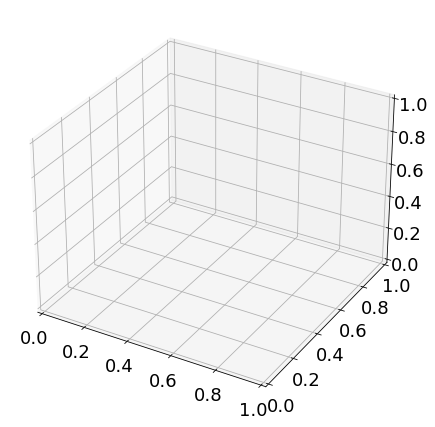

In [2]:
# Plot sphere
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1, projection='3d')   # 121: nrows, ncols, index
u = np.linspace(-np.pi, np.pi, 100)
print(u)
v = np.linspace(0, np.pi, 100) 

## A parametric equation for the sphere
#  x = x0 + r*sin(v)*cos(u)
#  y = y0 + r*sin(v)*cos(v)
#  z = z0 + r*cos(v)

x = np.outer(np.cos(u), np.sin(v))           
y = np.outer(np.sin(u), np.sin(v))            
z = np.outer(np.ones(np.size(u)), np.cos(v))   
print(x.shape)
print(y.shape)
print(z.shape)
print(z)

(-2.0, 2.0)

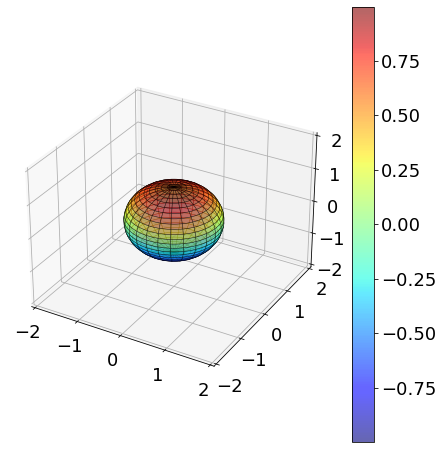

In [3]:
# Plot sphere
fig = plt.figure()
ax1 = fig.add_subplot(121, projection='3d')   # 121: nrows, ncols, index
u = np.linspace(-np.pi, np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = np.outer(np.cos(u), np.sin(v))
y = np.outer(np.sin(u), np.sin(v))
z = np.outer(np.ones(np.size(u)), np.cos(v))

# Plot the surface
surf1 = ax1.plot_surface(x, y, z, cmap='jet', alpha=0.6, 
                         #facecolors=plt.cm.jet(z), #edgecolor='k',
                         linewidth=0.5, rcount=30, ccount=30)
surf1.set_edgecolor('k')
fig.colorbar(surf1)
ax1.set_xlim3d(-2, 2)
ax1.set_ylim3d(-2, 2)
ax1.set_zlim3d(-2, 2)

In [4]:

xR = np.zeros_like(x)
yR = np.zeros_like(y)
zR = np.zeros_like(z)

for i in range(x.shape[0]):
    for j in range(x.shape[1]):
        vec = [x[i,j], y[i,j], z[i,j]]
        vecR = X @ vec
        # print(vecR)
        xR[i,j] = vecR[0]
        yR[i,j] = vecR[1]
        zR[i,j] = vecR[2]
        


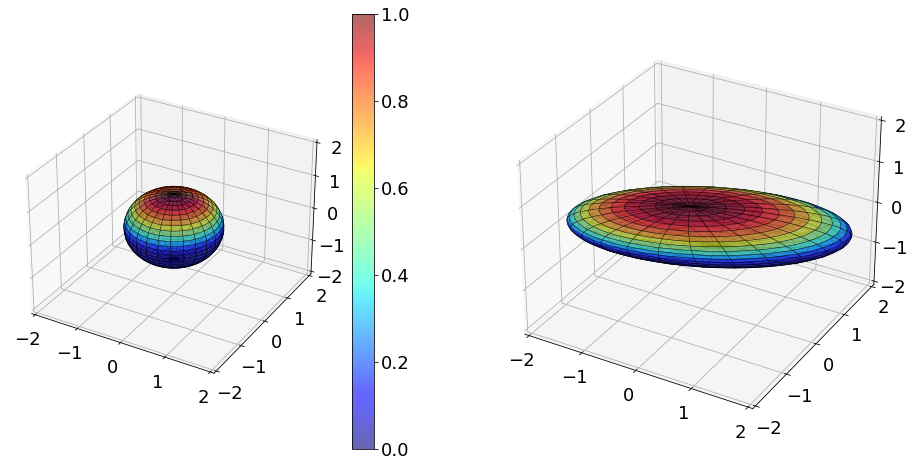

In [5]:
# Plot sphere
fig = plt.figure()
ax1 = fig.add_subplot(121, projection='3d')   # 121: nrows, ncols, index
u = np.linspace(-np.pi, np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = np.outer(np.cos(u), np.sin(v))
y = np.outer(np.sin(u), np.sin(v))
z = np.outer(np.ones(np.size(u)), np.cos(v))

# Plot the surface
surf1 = ax1.plot_surface(x, y, z, cmap='jet', alpha=0.6, facecolors=plt.cm.jet(z), linewidth=0.5, rcount=30, ccount=30)
surf1.set_edgecolor('k')
fig.colorbar(surf1)
ax1.set_xlim3d(-2, 2)
ax1.set_ylim3d(-2, 2)
ax1.set_zlim3d(-2, 2)

ax2 = fig.add_subplot(122, projection='3d')
surf2 = ax2.plot_surface(xR, yR, zR, cmap='jet',alpha=0.6,linewidth=0.5,facecolors=plt.cm.jet(z),rcount=30,ccount=30)
surf2.set_edgecolor('k')
ax2.set_xlim3d(-2, 2)
ax2.set_ylim3d(-2, 2)
ax2.set_zlim3d(-2, 2)
plt.show()